In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_excel('Reduced excel sheet from cleaned dataset.xlsx')

In [ ]:
df = dataset.copy()

In [ ]:
df.head()

,ID,Name,LongName,Nationality,Age,â†“OVA,POT,Contract,Positions,Contract_start_year,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,Hits_cleaned
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,2004 ~ 2021,"RW, ST, CF",2004,...,8,2231,466,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,2018 ~ 2022,"ST, LW",2018,...,11,2221,464,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,2014 ~ 2023,GK,2014,...,90,1413,489,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,2015 ~ 2023,"CAM, CM",2015,...,13,2304,485,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,2017 ~ 2022,"LW, CAM",2017,...,11,2175,451,91,85,86,94,36,59,595


In [ ]:
print(df.columns)

Index(['ID', 'Name', 'LongName', 'Nationality', 'Age', 'â†“OVA', 'POT',
       'Contract', 'Positions', 'Contract_start_year', 'Contract_end_year',
       'new_height', 'Weight_in_kg', 'Preferred Foot', 'BOV', 'Best Position',
       'Cleaned_Value_in_million', 'Cleaned_wages_in_K', 'Clean_release_value',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',

Q1) What is the average overall rating (OVA) of players in different age groups (e.g., under 20, 21-25, 26-30, 31-35, over 35)?

In [ ]:
print(df['Age'].dtype)

int64


Creating 'Age_category' column

In [ ]:
bins = [0,20,25,30,35,float('inf')]
labels = ['Under 20', '20-24', '25-29', '30-34', '>= 35']  #Creating bins and labels for different age-categories
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
temp = df[['Age_category','â†“OVA']]
result = temp.groupby('Age_category').mean()['â†“OVA']
result = result.reset_index()
result.columns = ['Age_category','Avg_overall']
print(result)

  Age_category  Avg_overall
0     Under 20    60.187742
1        20-24    64.901742
2        25-29    68.464852
3        30-34    69.411893
4        >= 35    68.650505


Q2) Do specific age groups excel in certain attributes like shooting or passing?

In [ ]:
print(df[['SHO', 'PAS']].dtypes)

SHO    int64
PAS    int64
dtype: object


In [ ]:
temp = df[['Age_category','SHO','PAS']]
result = temp.groupby('Age_category').mean()[['SHO','PAS']]   #Finding average shot and pass for different age categories
result = result.reset_index()
result.columns = ['Age_category','Average shooting','Average passing']
print(result)

  Age_category  Average shooting  Average passing
0     Under 20         48.698216        52.443755
1        20-24         51.697785        56.494335
2        25-29         56.072161        60.190751
3        30-35         57.610587        61.995286
4        >= 35         59.896970        62.416162


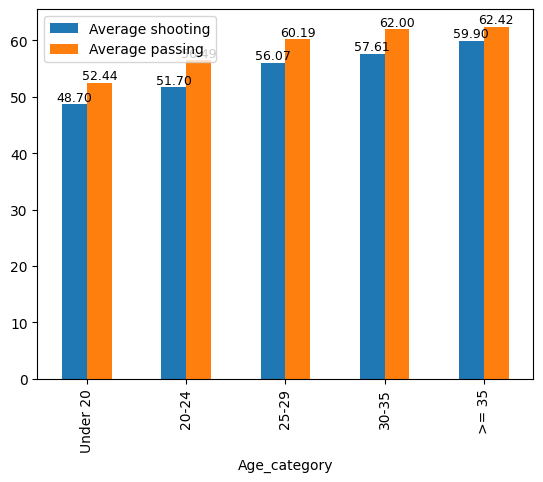

In [ ]:
plotting = result.plot(x = 'Age_category', y = ['Average shooting','Average passing'], kind ='bar')  #dual bar graph
for bar in plotting.patches:
  plotting.annotate(format(bar.get_height(), '.2f'),       #annotating bar graph
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')

Q2) Is there a correlation between the length of a player's contract and their market value?

In [ ]:
df['Contract_length'] = df['Contract_end_year'] - df['Contract_start_year']  #Adding a new column 'Contract_length'

In [ ]:
correlation = df['Contract_length'].corr(df['Cleaned_Value_in_million'])
print(format(correlation,'.3f'))

0.225


In [ ]:
#Positive correlation of 0.225 indicates that players with longer contracts have high market values

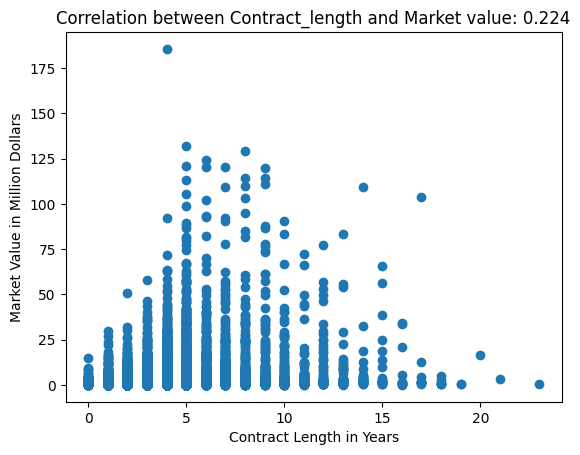

In [ ]:
plt.scatter(df['Contract_length'], df['Cleaned_Value_in_million']) #Scatter plot
plt.xlabel('Contract Length in Years')
plt.ylabel('Market Value in Million Dollars')
plt.title('Correlation between Contract_length and Market value: ' + str(correlation)[0:5])
plt.show()

Q) Are there differences in attribute ratings (e.g., shooting accuracy) between players who prefer their left foot and those who prefer their right foot?

In [ ]:
temp = df[['Preferred Foot','Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control']]

In [ ]:
result = temp.groupby('Preferred Foot').mean()[['Crossing', 'Finishing', 'Heading Accuracy',
                                                'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
                                                'FK Accuracy', 'Long Passing', 'Ball Control']]
result = result.reset_index()
result.columns = ['Preferred Foot','Crossing', 'Finishing', 'Heading Accuracy',
                                                'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
                                                'FK Accuracy', 'Long Passing', 'Ball Control']


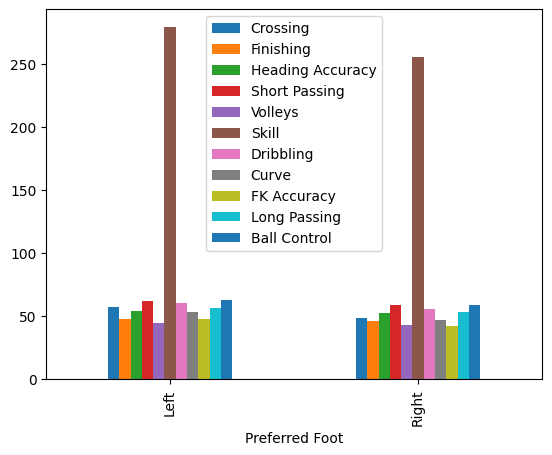

In [ ]:
plotting = result.plot(x = 'Preferred Foot', y = ['Crossing', 'Finishing', 'Heading Accuracy',
                                                'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
                                                'FK Accuracy', 'Long Passing', 'Ball Control'], kind = 'bar')

Q) Which nationalities produce the most players in specific positions (e.g., goalkeepers, midfielders, forwards)

In [ ]:
temp = df[['Nationality','Best Position']]
result = temp.groupby(['Best Position'])


In [ ]:
print(df.columns)

Index(['ID', 'Name', 'LongName', 'Nationality', 'Age', 'â†“OVA', 'POT',
       'Contract', 'Positions', 'Contract_start_year', 'Contract_end_year',
       'new_height', 'Weight_in_kg', 'Preferred Foot', 'BOV', 'Best Position',
       'Cleaned_Value_in_million', 'Cleaned_wages_in_K', 'Clean_release_value',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',

In [ ]:
#value_counts = df['Best Position'].value_counts()
#print(value_counts)
a = list(df['Nationality'].unique())
b = list(df['Best Position'].unique())
print(a)
print(b)

['Argentina', 'Portugal', 'Slovenia', 'Belgium', 'Brazil', 'Poland', 'Egypt', 'France', 'Germany', 'Netherlands', 'Senegal', 'Spain', 'England', 'Scotland', 'Korea Republic', 'Costa Rica', 'Italy', 'Gabon', 'Croatia', 'Uruguay', 'Switzerland', 'Serbia', 'Slovakia', 'Morocco', 'Algeria', 'Denmark', 'Hungary', 'Bosnia Herzegovina', 'Nigeria', 'Cameroon', 'Norway', 'Ghana', 'Mexico', 'Austria', 'Albania', 'Colombia', 'Chile', 'Ivory Coast', 'Greece', 'Finland', 'Sweden', 'Togo', 'Czech Republic', 'Russia', 'Wales', 'Venezuela', 'Canada', 'United States', 'Guinea', 'Montenegro', 'Israel', 'Republic of Ireland', 'Ukraine', 'Turkey', 'Jamaica', 'DR Congo', 'Australia', 'Armenia', 'Northern Ireland', 'Ecuador', 'North Macedonia', 'Kosovo', 'Mali', 'Peru', 'China PR', 'Central African Republic', 'Iceland', 'Burkina Faso', 'Paraguay', 'Japan', 'Romania', 'New Zealand', 'Angola', 'Tunisia', 'Syria', 'Dominican Republic', 'Cape Verde', 'Equatorial Guinea', 'Kenya', 'Georgia', 'Panama', 'Zambia', 

In [ ]:
temp = df[['Nationality','Best Position']]
result = temp.groupby(['Nationality','Best Position']).size().unstack(fill_value=0)
print(result)

Best Position  CAM  CB  CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  RWB  ST
Nationality                                                                  
Afghanistan      0   0    0   0   0   0   1   0   0    0   0   1   0    0   0
Albania          4  10    8   0   2   2   1   3   0    1   2   3   0    0  10
Algeria          6   7    2   0   3   6   2   2   1    0   1   7   3    0   6
Andorra          0   1    0   0   0   0   0   0   0    0   0   0   0    0   0
Angola           0   3    1   0   0   1   0   3   0    1   0   3   0    0   2
...            ...  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..
Uzbekistan       2   2    0   0   2   0   0   1   0    0   0   0   0    0   1
Venezuela       18  28   12   1   4  11   9   5   2    0   9  10   3    1  21
Wales           11  17    5   0   3   9   6   4   0    2   4   7   1    5  11
Zambia           1   1    0   0   1   0   0   0   1    0   0   0   1    0   5
Zimbabwe         0   1    3   0   0   0   0   0   0    0   1   0

In [ ]:
for i in result:
  print(i,max(result[i]))

CAM 143
CB 273
CDM 85
CF 12
CM 71
GK 137
LB 72
LM 58
LW 20
LWB 37
RB 76
RM 121
RW 27
RWB 31
ST 203


Q) Are there any positions where players are undervalued compared to their wages, or vice versa?

In [ ]:
df['Cleaned_wages_in_million'] = df['Cleaned_wages_in_K'] * 0.001
temp = df[['Name','Best Position','Cleaned_Value_in_million','Cleaned_wages_in_million']]
result = temp.groupby('Best Position').mean()[['Cleaned_Value_in_million','Cleaned_wages_in_million']]
result = result.reset_index()
result = result.sort_values(by ='Cleaned_Value_in_million', ascending = True)
result.columns = ['Position','Value_in_M','Wage_in_million']
print(result)

   Position  Value_in_M  Wage_in_million
5        GK    2.471377         0.156368
11       RM    2.566570         0.112191
1        CB    2.592634         0.110364
10       RB    2.816819         0.100698
6        LB    2.882005         0.111370
13      RWB    2.969380         0.115719
9       LWB    3.059447         0.096570
14       ST    3.147577         0.095238
2       CDM    3.262672         0.103108
7        LM    3.281913         0.109904
0       CAM    4.124752         0.119823
12       RW    4.261326         0.101519
4        CM    4.614342         0.089110
8        LW    5.935793         0.114683
3        CF    7.204071         0.093457


<ipython-input-24-7ddb3af1bbe9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = temp.groupby('Best Position').mean()[['Cleaned_Value_in_million','Cleaned_wages_in_million']]


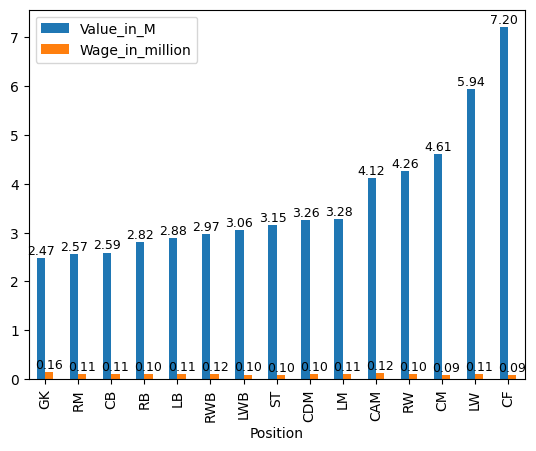

In [ ]:
plotting = result.plot(x = 'Position', y = ['Value_in_M','Wage_in_million'], kind ='bar')  #dual bar graph
for bar in plotting.patches:
  plotting.annotate(format(bar.get_height(), '.2f'),       #annotating bar graph
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')

In [ ]:
#### Conclusion

Q) Do players in certain age groups tend to sign longer or shorter contracts? Are there patterns in contract expiration based on age and potential (POT) ratings?

In [ ]:
print(df['Contract_length'][0:7])

0    17
1     4
2     9
3     8
4     5
5     9
6     6
Name: Contract_length, dtype: int64


In [ ]:
print(df['Age_category'].unique())

['30-35', '>= 35', '25-29', '20-24', 'Under 20']
Categories (5, object): ['Under 20' < '20-24' < '25-29' < '30-35' < '>= 35']


In [ ]:
temp = df[['Age_category','Contract_length']]
result = temp.groupby('Age_category').mean()['Contract_length']
result = result.reset_index()
print(result)

  Age_category  Contract_length
0     Under 20         3.206362
1        20-24         3.617960
2        25-29         3.951893
3        30-34         4.028644
4        >= 35         3.844444


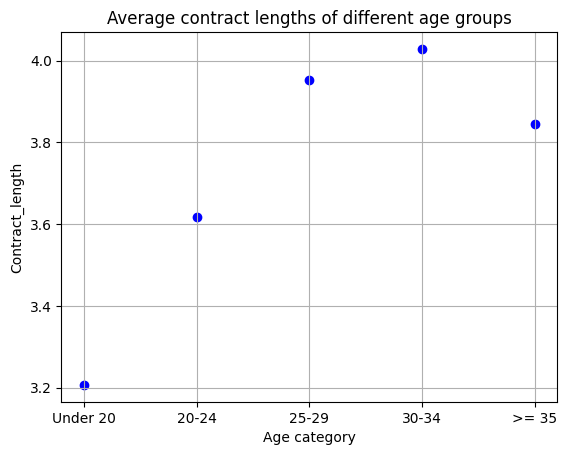

In [ ]:
plt.scatter(result['Age_category'],result['Contract_length'], marker='o', color='b', label='Data Points')
plt.xlabel('Age category')
plt.ylabel('Contract_length')
plt.title('Average contract lengths of different age groups')
plt.grid(True)
plt.show()

In [ ]:
## Conclusion

In [ ]:
temp = df[['Age_category','Contract_end_year','POT']]
result = temp.groupby('Age_category').mean()[['Contract_end_year','POT']]
result = result.reset_index()
print(result)

  Age_category  Contract_end_year        POT
0     Under 20        2021.983708  75.700543
1        20-24        2022.026890  73.230678
2        25-29        2022.149543  70.027969
3        30-34        2022.054750  69.421320
4        >= 35        2022.000000  68.650505


In [ ]:
result['Contract_end_year'] = result['Contract_end_year'].round().astype(int)
result['POT'] = result['POT'].round().astype(int)
print(result)

  Age_category  Contract_end_year  POT
0     Under 20               2022   76
1        20-24               2022   73
2        25-29               2022   70
3        30-34               2022   69
4        >= 35               2022   69


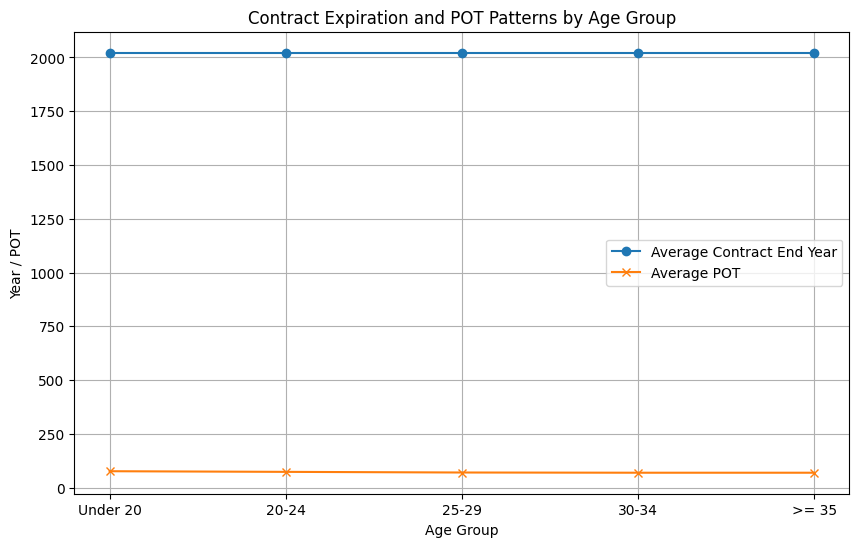

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result['Age_category'], result['Contract_end_year'], label='Average Contract End Year', marker='o')
plt.plot(result['Age_category'], result['POT'], label='Average POT', marker='x')
plt.xlabel('Age Group')
plt.ylabel('Year / POT')
plt.title('Contract Expiration and POT Patterns by Age Group')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Conclusion

Q) Are there attribute combinations that correlate strongly with a player's overall rating (OVA)?

Can you identify the key attributes that contribute the most to a player's overall rating?

In [ ]:
print(df['Best Position'].unique())

['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']


In [ ]:
temp = df[['Best Position','â†“OVA', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes','PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]

#Positions along with attributes
temp.head()

,Best Position,â†“OVA,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,PAC,SHO,PAS,DRI,DEF,PHY
0,RW,93,429,85,95,70,91,88,470,96,...,11,15,14,8,85,92,91,95,38,65
1,ST,92,437,84,95,90,82,86,414,88,...,11,15,14,11,89,93,81,89,35,77
2,GK,91,95,13,11,15,43,13,109,12,...,92,78,90,90,87,92,78,90,52,90
3,CAM,91,407,94,82,55,94,82,441,88,...,13,5,10,13,76,86,93,88,64,78
4,LW,91,408,85,87,62,87,87,448,95,...,9,15,15,11,91,85,86,94,36,59


In [ ]:
result = temp.groupby('Best Position').mean()[['â†“OVA','Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes','PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]

result = result[['â†“OVA','Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes','PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].round().astype(int)

result = result.reset_index()
print(result)

   Best Position  â†“OVA  Attacking  Crossing  Finishing  Heading Accuracy  \
0            CAM      66        290        59         60                48   
1             CB      66        234        43         32                66   
2            CDM      68        273        54         47                58   
3             CF      71        328        59         72                63   
4             CM      68        295        60         56                55   
5             GK      66         79        14         12                14   
6             LB      67        262        64         41                56   
7             LM      67        291        64         60                48   
8             LW      69        301        65         65                49   
9            LWB      67        265        66         44                52   
10            RB      67        262        63         40                57   
11            RM      66        284        62         59        

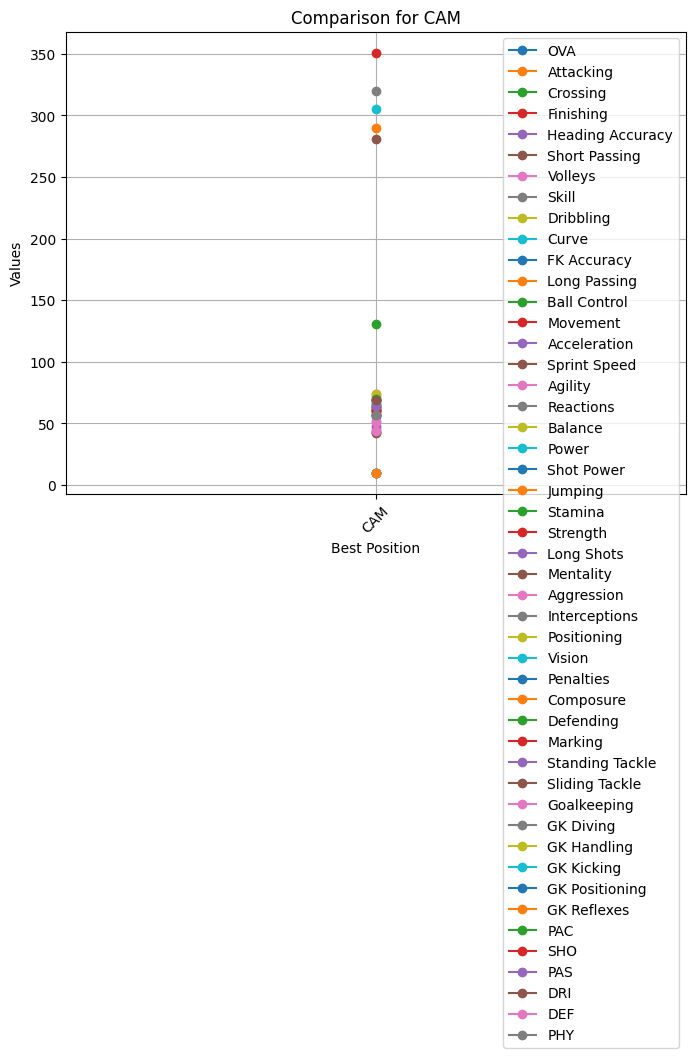

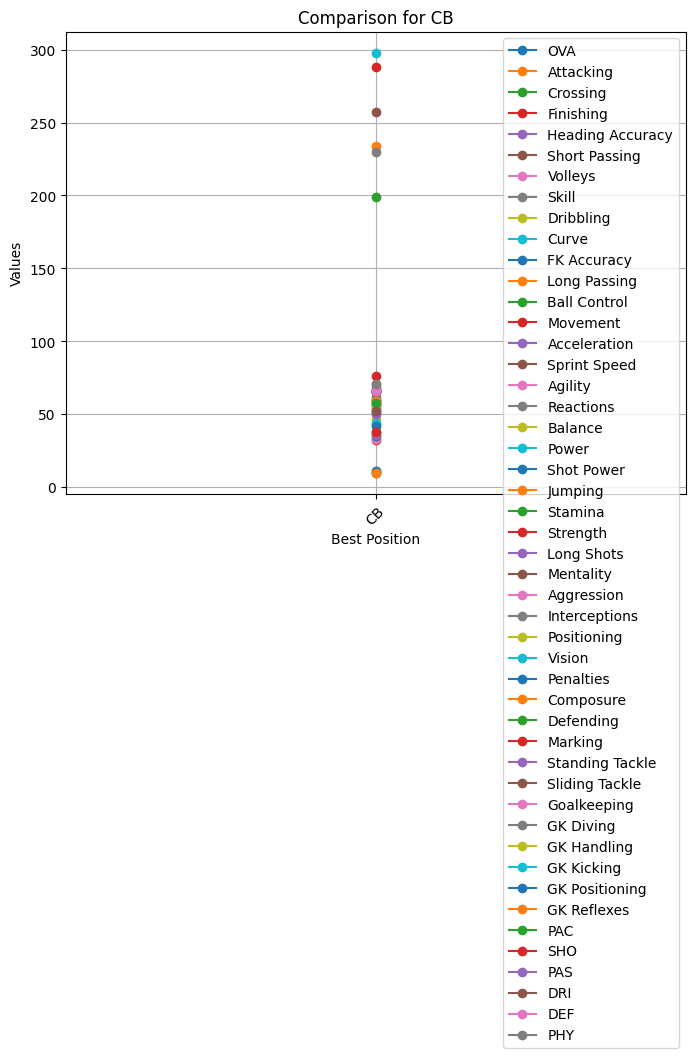

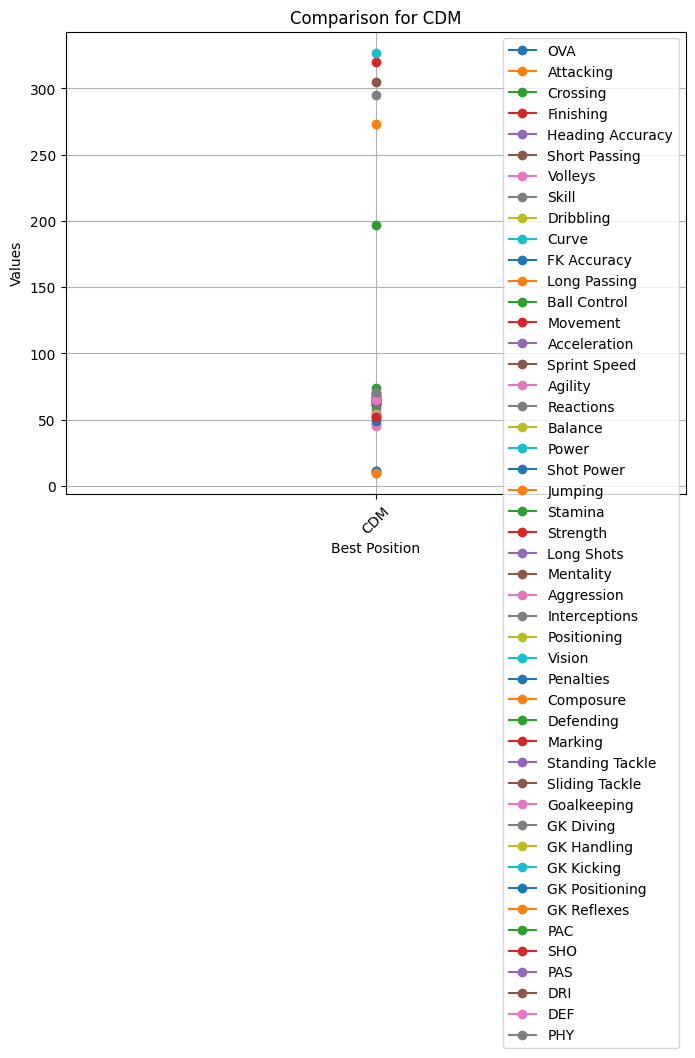

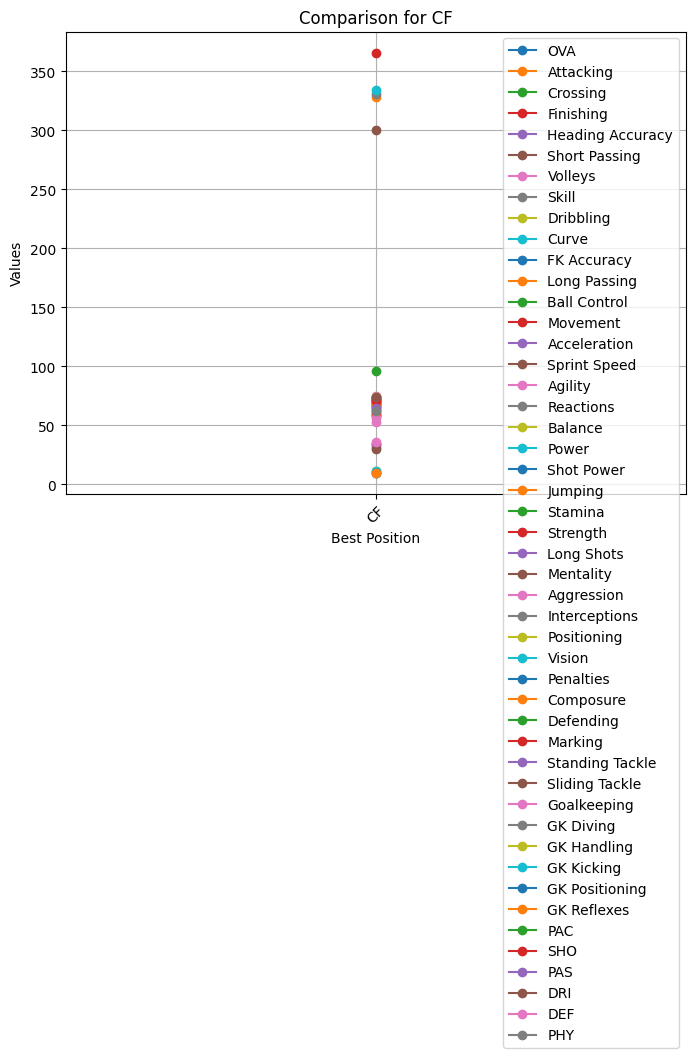

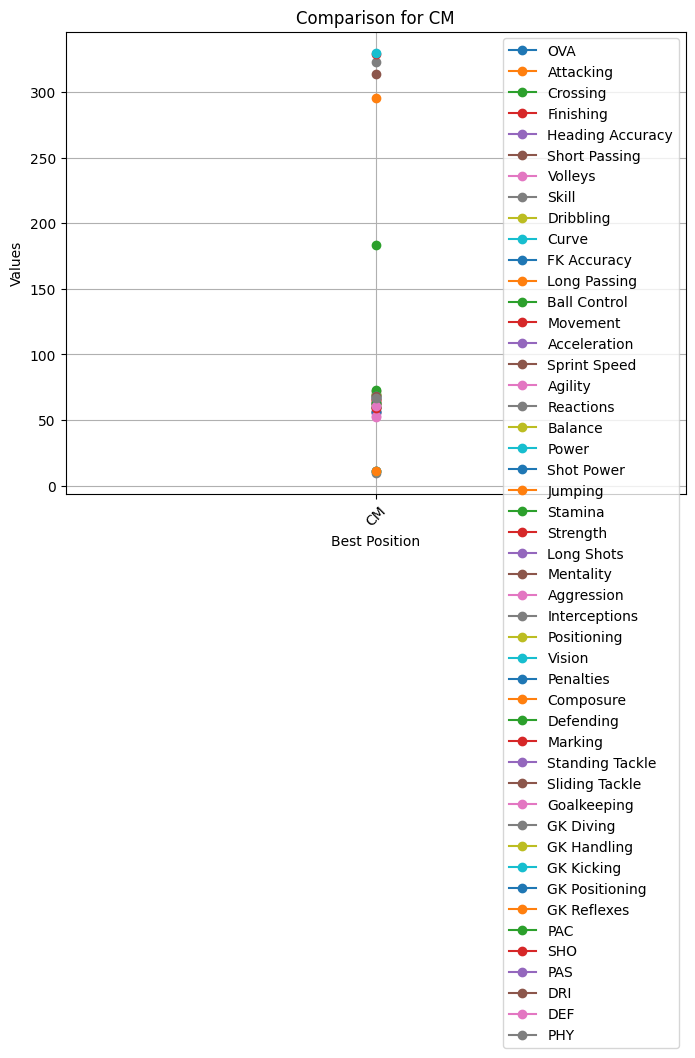

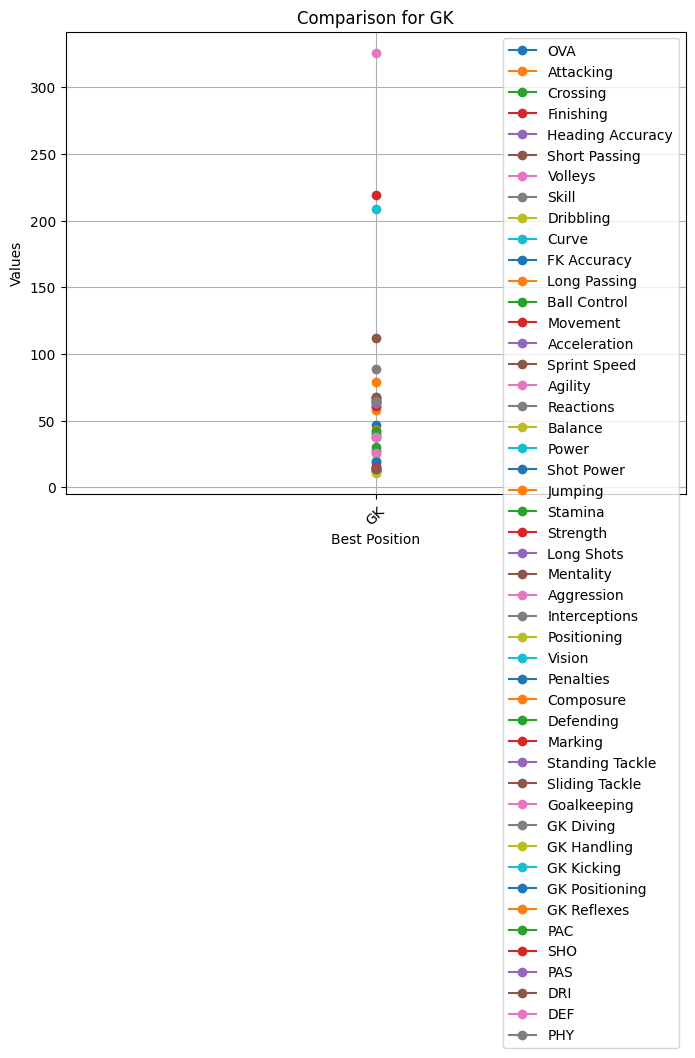

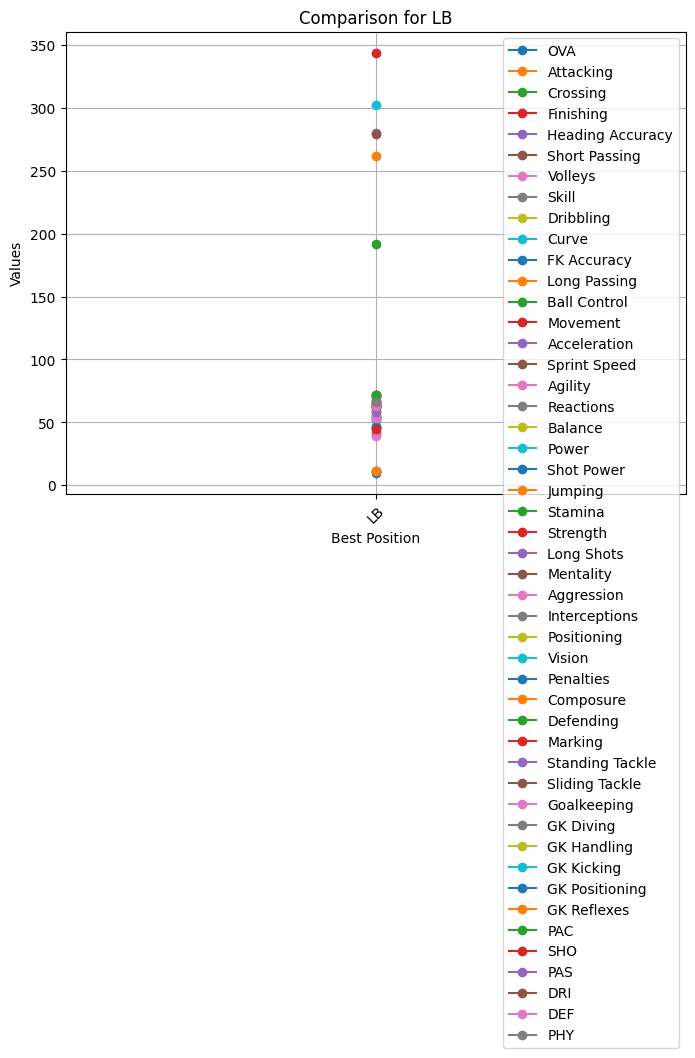

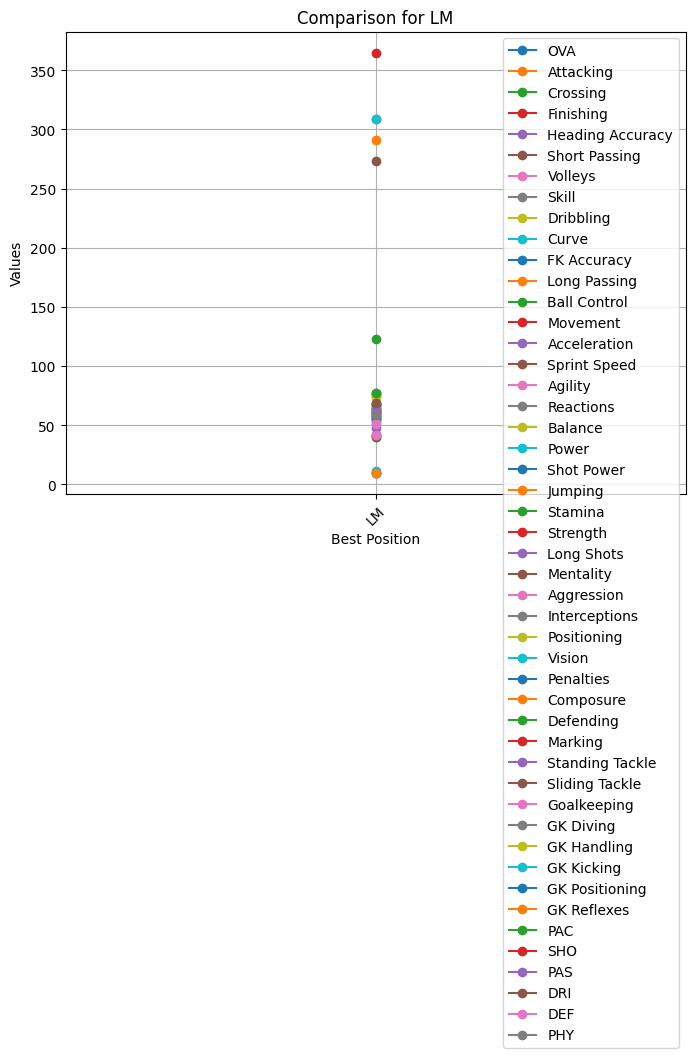

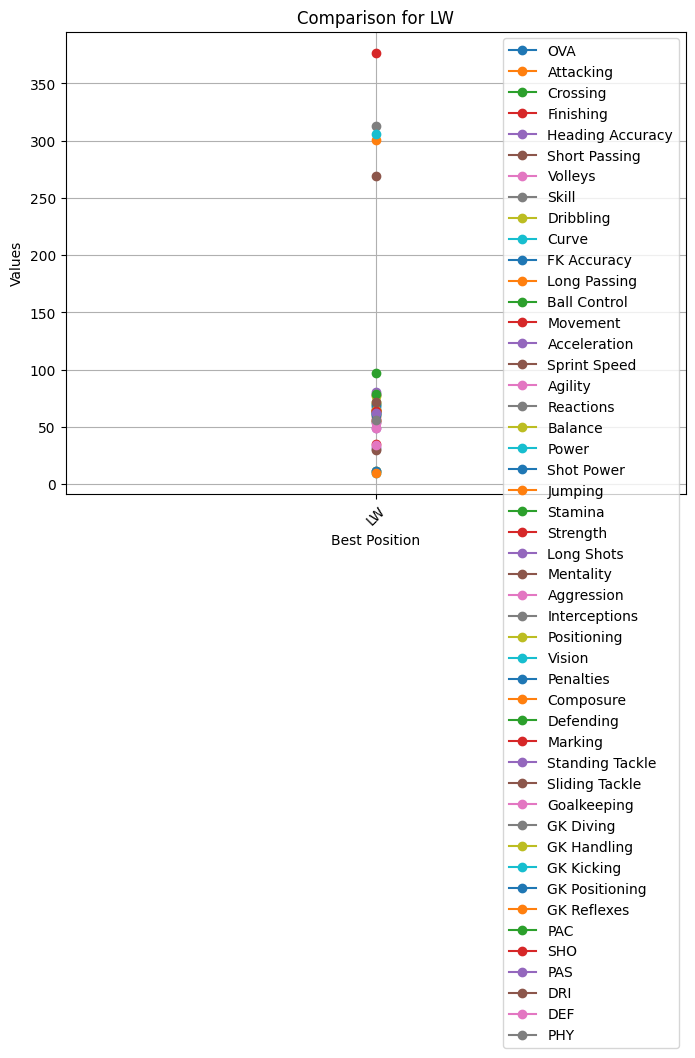

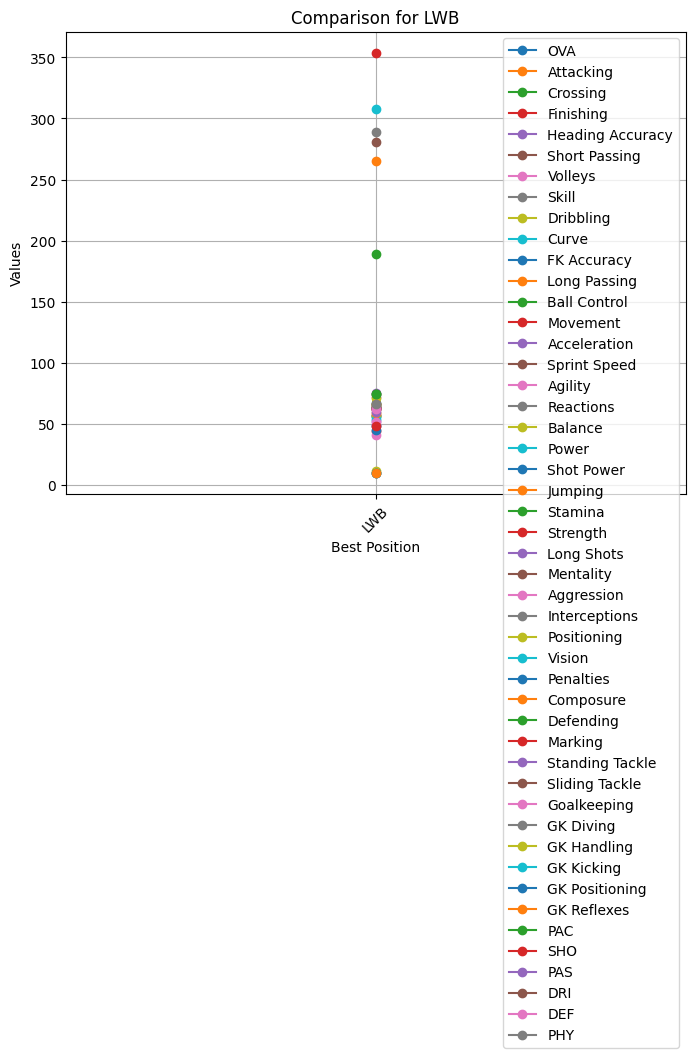

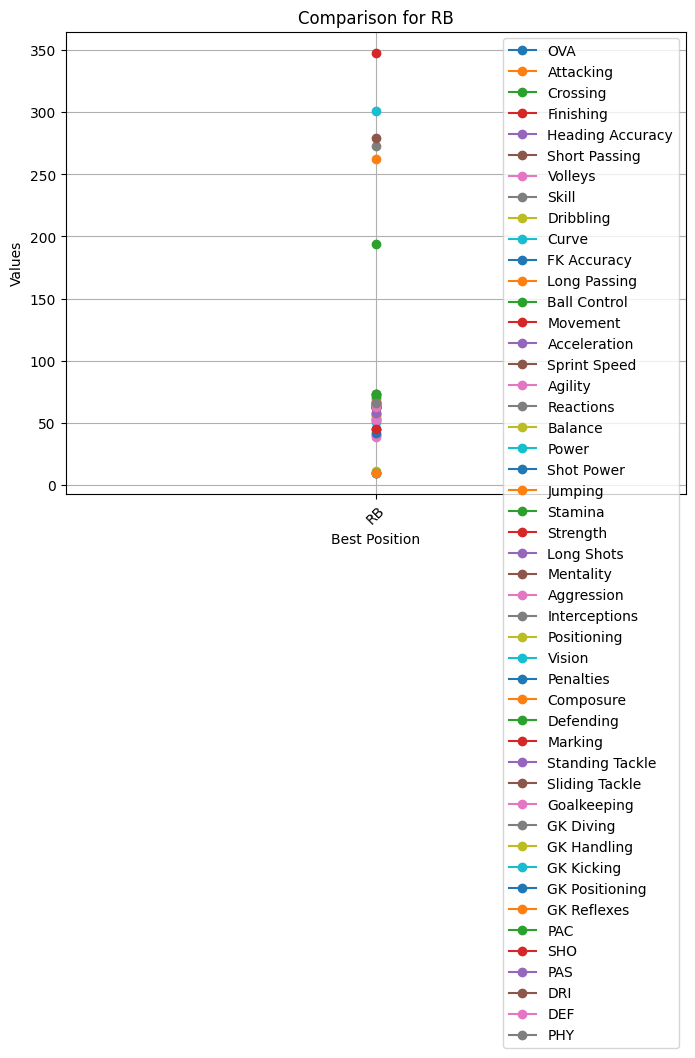

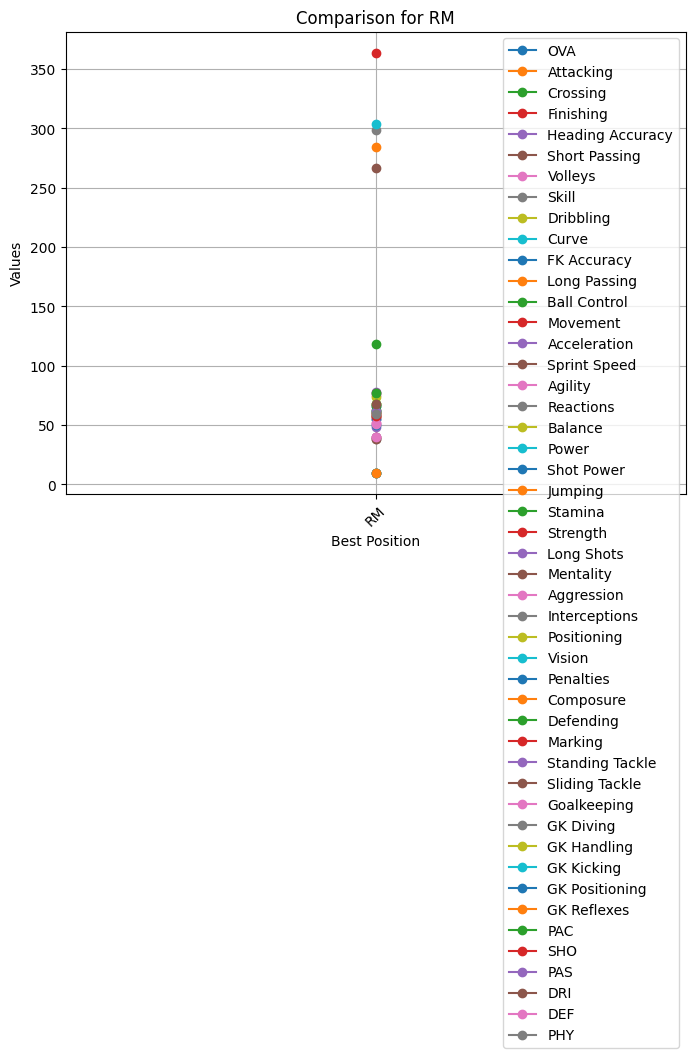

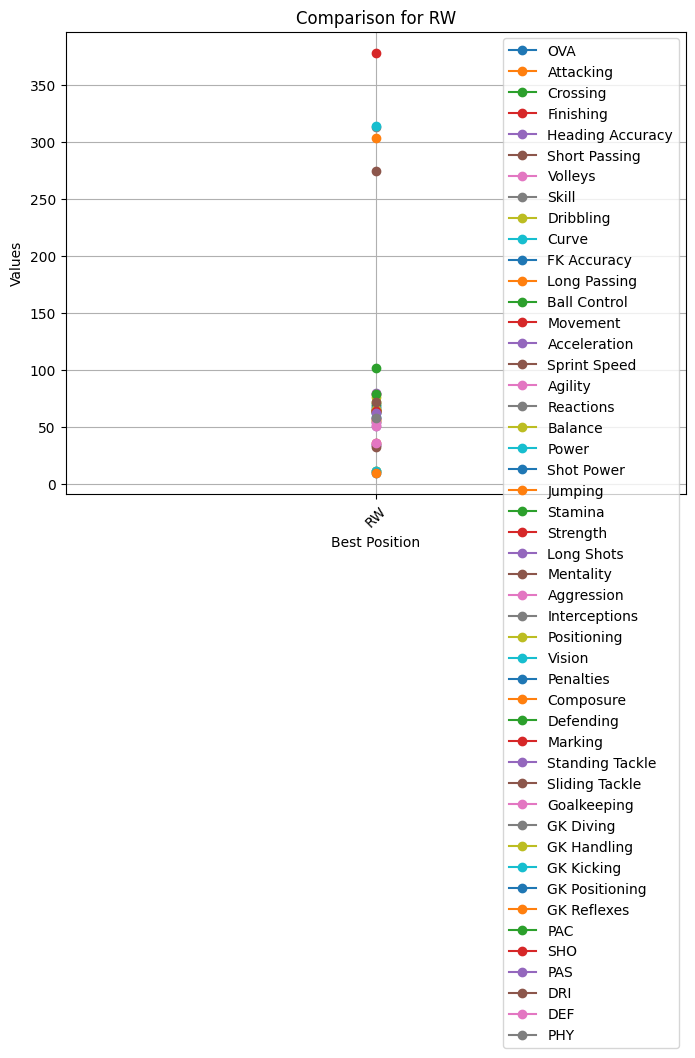

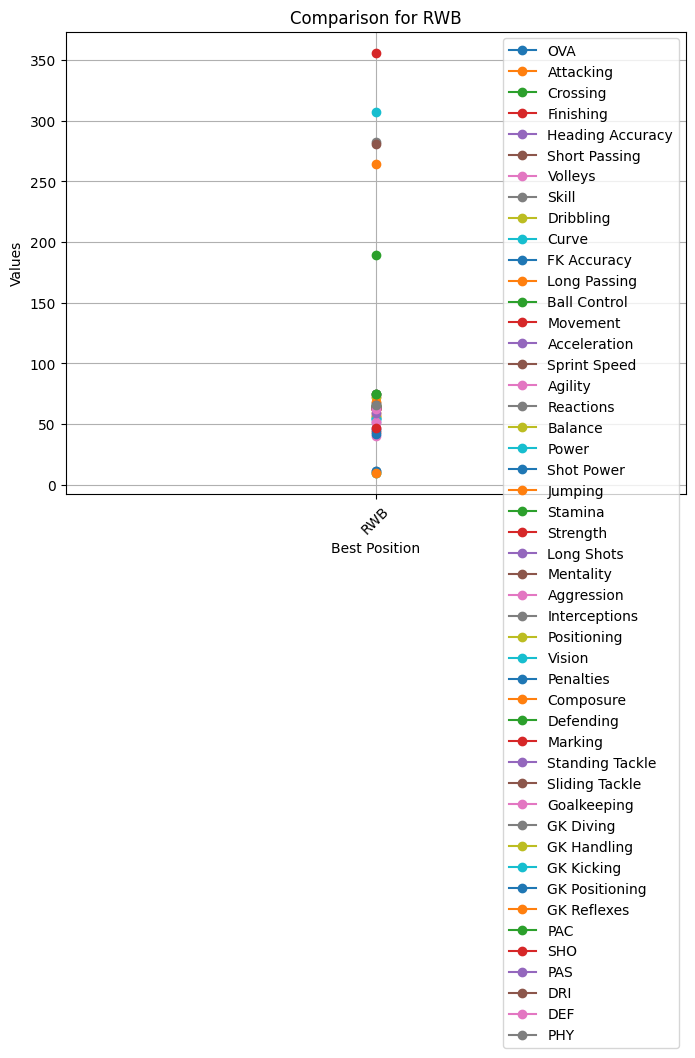

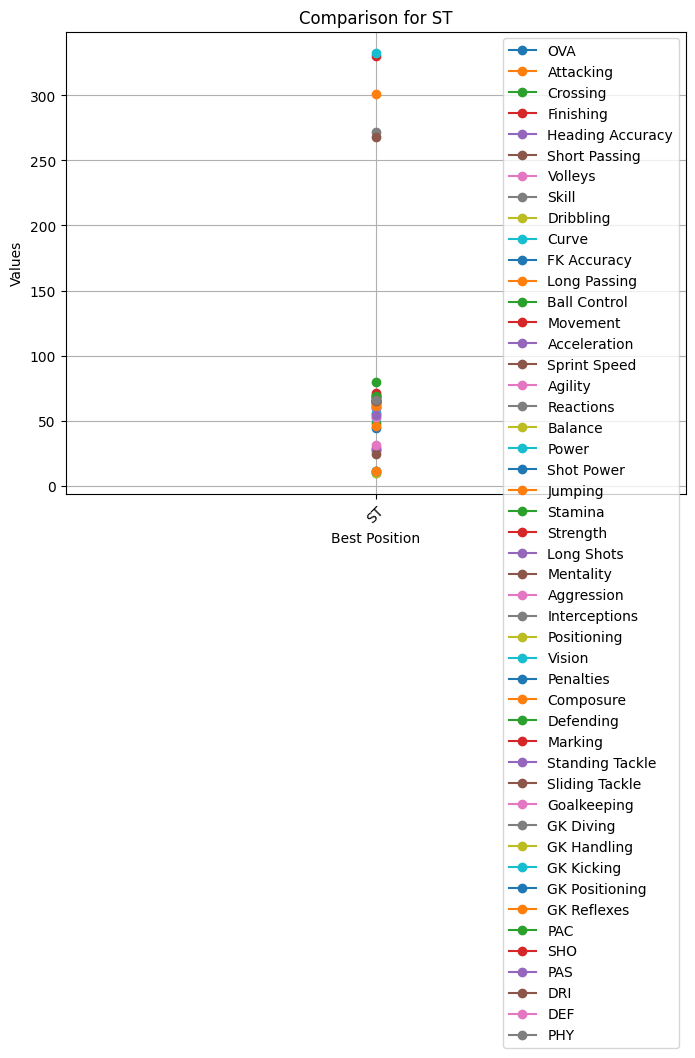

In [ ]:
for position, group in result.groupby('Best Position'):
    plt.figure(figsize=(8, 6))
    plt.plot(group['Best Position'], group['â†“OVA'], marker='o', linestyle='-', label='OVA')
    for column in group.columns[2:]:
        plt.plot(group['Best Position'], group[column], marker='o', linestyle='-', label=column)
    plt.xlabel('Best Position')
    plt.ylabel('Values')
    plt.title(f'Comparison for {position}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Conclusion